## Importing libraries

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import warnings

from math import isnan, sqrt, log
from scipy import stats
from scipy.special import comb

warnings.filterwarnings('ignore')
sns.set(color_codes=True)

## Data Reading

In [2]:
#Reading the JSON file for Samsung
df_raw = pd.read_json(r"C:\Users\santo\Desktop\Phyton\Social Media\New folder\Social Media Assignment 2\Social Media Assignment 2\New folder\samsung_Search1.json", lines=True)     

In [3]:
#Display the Dataframe
df_raw.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,"{'type': 'Point', 'coordinates': [-73.99656, 4...",2019-10-10 00:21:57,"[0, 115]","{'hashtags': [{'text': 'Samsung', 'indices': [...",NaN,0,False,"Ready, set and let’s go #Samsung #galaxyfold l...","{'type': 'Point', 'coordinates': [40.7158299, ...",...,0.0,NaN,NaN,NaN,0,False,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",False,"{'id': 18014488, 'id_str': '18014488', 'name':..."
1,NaN,None,2019-10-10 00:20:53,"[0, 140]","{'hashtags': [{'text': 'Identity', 'indices': ...",NaN,0,False,RT @TRONyZH: Take Back Your #Identity with #Un...,None,...,0.0,NaN,NaN,NaN,2,False,{'created_at': 'Wed Oct 09 20:41:51 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 953717900854136833, 'id_str': '95371790..."
2,NaN,None,2019-10-10 00:20:11,"[0, 140]","{'hashtags': [{'text': 'instasamsung', 'indice...",NaN,0,False,"RT @cs80127: samsung galaxy family, check out ...",None,...,0.0,NaN,NaN,NaN,1,False,{'created_at': 'Wed Oct 09 19:02:21 +0000 2019...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,"{'id': 2957399208, 'id_str': '2957399208', 'na..."
3,NaN,"{'type': 'Point', 'coordinates': [-110.9923904...",2019-10-10 00:15:11,"[0, 153]","{'hashtags': [{'text': 'Sales', 'indices': [26...",NaN,0,False,"See our latest Tucson, AZ #Sales job opportuni...","{'type': 'Point', 'coordinates': [32.2680738, ...",...,NaN,NaN,NaN,NaN,0,False,NaN,"<a href=""https://www.careerarc.com"" rel=""nofol...",False,"{'id': 21685512, 'id_str': '21685512', 'name':..."
4,NaN,None,2019-10-10 00:15:05,"[0, 278]","{'hashtags': [{'text': 'GalaxyNote10Plus', 'in...","{'media': [{'id': 1182087115095646208, 'id_str...",0,False,New glass screen protector for #GalaxyNote10Pl...,None,...,0.0,NaN,NaN,NaN,0,False,NaN,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",False,"{'id': 943633777904951296, 'id_str': '94363377..."


In [4]:
#Displaying the Info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 31 columns):
contributors                 0 non-null float64
coordinates                  186 non-null object
created_at                   2997 non-null datetime64[ns]
display_text_range           2997 non-null object
entities                     2997 non-null object
extended_entities            1144 non-null object
favorite_count               2997 non-null int64
favorited                    2997 non-null bool
full_text                    2997 non-null object
geo                          186 non-null object
id                           2997 non-null int64
id_str                       2997 non-null int64
in_reply_to_screen_name      126 non-null object
in_reply_to_status_id        87 non-null float64
in_reply_to_status_id_str    87 non-null float64
in_reply_to_user_id          126 non-null float64
in_reply_to_user_id_str      126 non-null float64
is_quote_status              2997 non-null bool

In [5]:
df_raw["user"][0]

{'id': 18014488,
 'id_str': '18014488',
 'name': 'Dj Erick La Peau',
 'screen_name': 'djlapeau',
 'location': 'Brooklyn',
 'description': 'All about the music',
 'url': 'http://t.co/XpNQfhH6nO',
 'entities': {'url': {'urls': [{'url': 'http://t.co/XpNQfhH6nO',
     'expanded_url': 'http://www.djericklapeau.com/',
     'display_url': 'djericklapeau.com',
     'indices': [0, 22]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 1333,
 'friends_count': 1132,
 'listed_count': 36,
 'created_at': 'Wed Dec 10 07:05:41 +0000 2008',
 'favourites_count': 427,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 1890,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '1A1B1F',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme9/bg.gif',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/them

In [6]:
#Checking all the columns
df_raw.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'metadata', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [7]:
# Printing First Entity 
df_raw["entities"][0]

{'hashtags': [{'text': 'Samsung', 'indices': [24, 32]},
  {'text': 'galaxyfold', 'indices': [33, 44]},
  {'text': 'djericklapeau', 'indices': [52, 66]}],
 'symbols': [],
 'user_mentions': [],
 'urls': [{'url': 'https://t.co/F9l5RyNbzZ',
   'expanded_url': 'https://www.instagram.com/p/B3asvvknzDQ/?igshid=1x7a7cljm01i2',
   'display_url': 'instagram.com/p/B3asvvknzDQ/…',
   'indices': [92, 115]}]}

## Data Extraction

In [8]:
# New Data Frame is Created
df = pd.DataFrame()

### Extract user information

In [9]:
#"owner" of the status in which they can reply, mention or retweet other users
df["owner_name"] = df_raw["user"].apply(lambda x: x["screen_name"])
df["owner_id"] = df_raw["user"].apply(lambda x: x["id_str"])
df["owner_nfollowers"] = df_raw["user"].apply(lambda x: x["followers_count"])
df["owner_nfriends"] = df_raw["user"].apply(lambda x: x["friends_count"])

In [10]:
# Dataframe is displayed
df.head()

,owner_name,owner_id,owner_nfollowers,owner_nfriends
0,djlapeau,18014488,1333,1132
1,Crypt0_Mike,953717900854136833,207,385
2,cs80127,2957399208,387,1778
3,tmj_tuc_sales,21685512,422,275
4,whitestone_UK,943633777904951296,521,3832


### Extract user mentions

In [11]:
#List of user_id/username who are mentioned will be gathered in the data frame. Null interaction will be encoded as None.
df["user_mentioned_name"] = df_raw["entities"].apply(lambda x: ':'.join([user["screen_name"] for user in x["user_mentions"]]) if x["user_mentions"] else None)
df["user_mentioned_id"] = df_raw["entities"].apply(lambda x: ':'.join([user["id_str"] for user in x["user_mentions"]]) if x["user_mentions"] else None)

### Extract user retweet

In [12]:
#Gathering retweeted in this status who is username/id of user. None will be replaced with NULL
df["user_retweeted_name"] = df_raw["retweeted_status"].apply(lambda x: x["user"]["screen_name"] if x is not np.nan else None)
df["user_retweeted_id"] = df_raw["retweeted_status"].apply(lambda x: x["user"]["id_str"] if x is not np.nan else None)

In [13]:
#Dataframe is displayed
df.head()

,owner_name,owner_id,owner_nfollowers,owner_nfriends,user_mentioned_name,user_mentioned_id,user_retweeted_name,user_retweeted_id
0,djlapeau,18014488,1333,1132,None,None,None,None
1,Crypt0_Mike,953717900854136833,207,385,TRONyZH:YouTube:justinsuntron:Tronfoundation,948630610737852416:10228272:902839045356744704...,TRONyZH,948630610737852416
2,cs80127,2957399208,387,1778,cs80127,2957399208,cs80127,2957399208
3,tmj_tuc_sales,21685512,422,275,None,None,None,None
4,whitestone_UK,943633777904951296,521,3832,None,None,None,None


### Extract user reply

In [14]:
#Extracting user Reply
df["user_replied_name"] = df_raw["in_reply_to_screen_name"]
df["user_replied_status_id"] = df_raw["in_reply_to_status_id"].apply(lambda x: None if isnan(x) else str(int(x)))
df["user_replied_id"] = df_raw["in_reply_to_user_id"].apply(lambda x: None if isnan(x) else str(int(x)))

In [15]:
# Let's preview the new data frame
df.head()

,owner_name,owner_id,owner_nfollowers,owner_nfriends,user_mentioned_name,user_mentioned_id,user_retweeted_name,user_retweeted_id,user_replied_name,user_replied_status_id,user_replied_id
0,djlapeau,18014488,1333,1132,None,None,None,None,None,None,None
1,Crypt0_Mike,953717900854136833,207,385,TRONyZH:YouTube:justinsuntron:Tronfoundation,948630610737852416:10228272:902839045356744704...,TRONyZH,948630610737852416,None,None,None
2,cs80127,2957399208,387,1778,cs80127,2957399208,cs80127,2957399208,None,None,None
3,tmj_tuc_sales,21685512,422,275,None,None,None,None,None,None,None
4,whitestone_UK,943633777904951296,521,3832,None,None,None,None,None,None,None


### Timestamp and contents

In [16]:
#Getting the Time stamp ID and Tweet Text
df["created_at"] = df_raw["created_at"]
df["id"] = df_raw["id"].astype(str)
df["text"] = df_raw["full_text"]

In [17]:
df.head(1)

,owner_name,owner_id,owner_nfollowers,owner_nfriends,user_mentioned_name,user_mentioned_id,user_retweeted_name,user_retweeted_id,user_replied_name,user_replied_status_id,user_replied_id,created_at,id,text
0,djlapeau,18014488,1333,1132,None,None,None,None,None,None,None,2019-10-10 00:21:57,1182088845053046784,"Ready, set and let’s go #Samsung #galaxyfold l..."


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 14 columns):
owner_name                2997 non-null object
owner_id                  2997 non-null object
owner_nfollowers          2997 non-null int64
owner_nfriends            2997 non-null int64
user_mentioned_name       1306 non-null object
user_mentioned_id         1306 non-null object
user_retweeted_name       858 non-null object
user_retweeted_id         858 non-null object
user_replied_name         126 non-null object
user_replied_status_id    87 non-null object
user_replied_id           126 non-null object
created_at                2997 non-null datetime64[ns]
id                        2997 non-null object
text                      2997 non-null object
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 327.9+ KB


## Build network graph

In [19]:
def update_retweet(id, user_name, tweet_id, status, graph):
    """
    Function to update the retweet into graph

    """
    if status["user_retweeted_id"] is not None:
        if status["user_retweeted_id"] != id:
            peer_id = status["user_retweeted_id"]
            peer_name = status["user_retweeted_name"]
            graph.add_edge(id, peer_id, tweet_id=tweet_id)
            graph.node[id]["name"] = user_name
            graph.node[peer_id]["name"] = peer_name

In [20]:
def update_reply(id, user_name, tweet_id, status, graph):
    
    """
    Function to update the user reply into graph
    """
    if status["user_replied_status_id"] is not None:
        if status["user_replied_status_id"] != id:
            peer_id = status["user_replied_status_id"]
            peer_name = status["user_replied_name"]
            graph.add_edge(id, peer_id, tweet_id=tweet_id)
            graph.node[id]["name"] = user_name
            graph.node[peer_id]["name"] = peer_name

In [21]:
def update_mention(user_id, user_name, tweet_id, status, graph):
    """
    
    Function to update the user mentions into graph
    
    """
    if status["user_mentioned_id"] is not None:
        if status["user_mentioned_id"] != user_id:
            peer_ids = status["user_mentioned_id"].split(":")
            peer_names = status["user_mentioned_name"].split(":")
            peers = dict(zip(peer_ids, peer_names))
            for peer_id, peer_name in peers.items():
                if len(peer_id) > 0:
                    graph.add_edge(user_id, peer_id, tweet_id=tweet_id)
                    graph.node[user_id]["name"] = user_name
                    graph.node[peer_id]["name"] = peer_name

In [22]:
def graph_update(status, graph):

    if status["owner_id"] is not None:  # user id might be None
        user_id = status["owner_id"]
        user_name = status["owner_name"]
        tw_id = status["id"]
        update_retweet(user_id, user_name, tw_id, status, graph)
        update_reply(user_id, user_name, tw_id, status, graph)
        update_mention(user_id, user_name, tw_id, status, graph)

In [23]:
# Empty Graph creation
graph = nx.Graph()

In [24]:
df.apply(lambda row: graph_update(row, graph), axis=1);

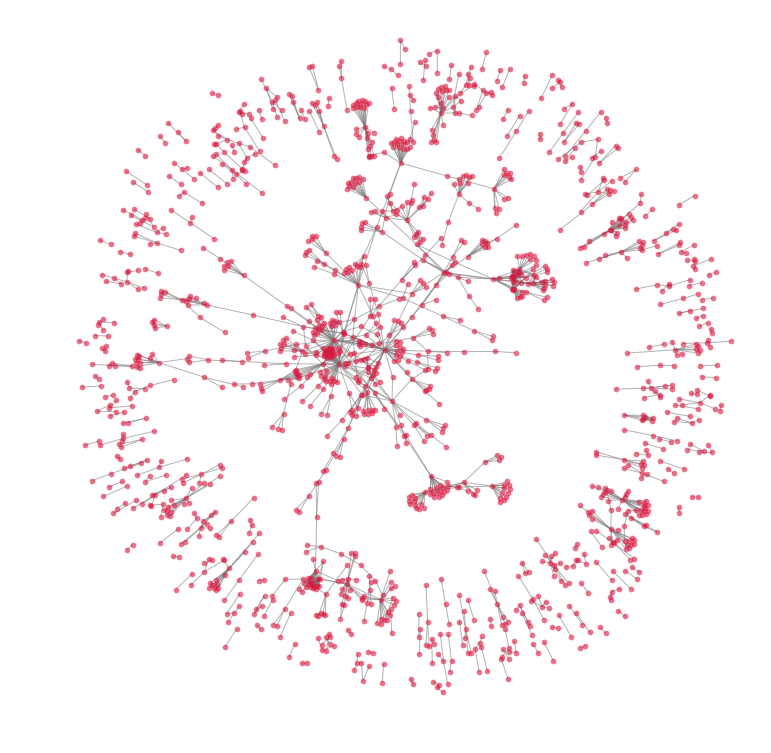

In [25]:
# Previewing the Graph
pos = nx.spring_layout(graph, k=0.05, seed=14)

plt.figure(figsize=(10, 10))
nx.draw(graph, pos=pos, edge_color="grey", node_color="crimson",
        linewidths=0.1, node_size=30, alpha=0.6, with_labels=False)
plt.show()

## Network graph analysis

### Total number of nodes and edges

In [26]:
# Number of nodes
print('Number of nodes: %d' %graph.number_of_nodes())

Number of nodes: 1505


In [27]:
# Number of edge
print('Number of edges: %d' %graph.number_of_edges())

Number of edges: 1605


### Network degree

In [28]:
degrees = [degree for node, degree in graph.degree()]

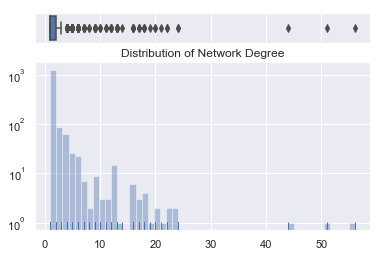

In [29]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                    gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(degrees, ax=ax_box)
sns.distplot(degrees, ax=ax_hist, kde=False, rug=True)

ax_box.set(xlabel='')
plt.yscale('log')
plt.title('Distribution of Network Degree')
plt.show()

In [30]:
print('Max degree: %d' % np.max(degrees))
print('Min degree: %d' % np.min(degrees))
print('Average degree: %f' % np.mean(degrees))
print('Most frequent degree: %d' % stats.mode(degrees)[0][0])

Max degree: 56
Min degree: 1
Average degree: 2.132890
Most frequent degree: 1


### Network density

In [31]:
nnodes = graph.number_of_nodes()
nedges = graph.number_of_edges()
dens = graph.number_of_edges()/comb(N=nnodes, k=2, exact=True)
print('Network density: %f' %dens)

Network density: 0.001418


### Clustering and transitivity

In [32]:
print('Clustering Coefficient of Network: %f' %nx.average_clustering(graph))
print('Transitivity of Network: %f' %nx.transitivity(graph))

Clustering Coefficient of Network: 0.100780
Transitivity of Network: 0.107440


In [33]:
print('Is the graph connected: %s' %nx.is_connected(graph))
print('Number of connected component: %d' %nx.number_connected_components(graph))

Is the graph connected: False
Number of connected component: 271


In [34]:
component_size = [len(g) for g in list(nx.connected_component_subgraphs(graph))]

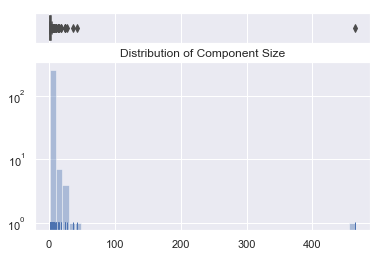

In [35]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(component_size, ax=ax_box)
sns.distplot(component_size, ax=ax_hist, kde=False, rug=True)

ax_box.set(xlabel='')
plt.yscale('log')
plt.title('Distribution of Component Size')
plt.show()

In [36]:
top_ten = sorted(nx.connected_component_subgraphs(
    graph), key=len, reverse=True)[:10]
len_top_ten_cc = [len(g) for g in top_ten]

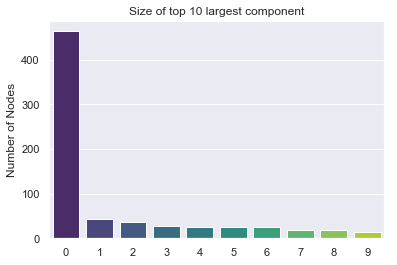

In [37]:
sns.barplot(x=list(range(0, 10)), y=len_top_ten_cc, palette="viridis")
plt.title('Size of top 10 largest component')
plt.ylabel('Number of Nodes')
plt.show()

In [38]:
print('Number of nodes in largest component: %d' % top_ten[0].number_of_nodes())
print('Number of edges in largest component: %d' % top_ten[0].number_of_edges())
print('Is the graph connected: %s' % nx.is_connected(top_ten[0]))

nnodes = top_ten[0].number_of_nodes()
nedges = top_ten[0].number_of_edges()
dens = top_ten[0].number_of_edges()/comb(N=nnodes, k=2, exact=True)


print('Network density: %f' %dens)

print('Clustering Coefficient of Network: %f' %nx.average_clustering(top_ten[0]))

print('Transitivity of Network: %f' %nx.transitivity(top_ten[0]))

Number of nodes in largest component: 464
Number of edges in largest component: 711
Is the graph connected: True
Network density: 0.006619
Clustering Coefficient of Network: 0.132095
Transitivity of Network: 0.105887


In [39]:
node_component = {}

for i, g in enumerate(top_ten):
    for node in g.nodes:
        node_component[node] = i

In [40]:
subgraph = graph.copy()

node_component_sorted = []

for node in graph.nodes:
    component = node_component.get(node, None)
    if component is not None:
        node_component_sorted.append(component)
    else:
        subgraph.remove_node(node)

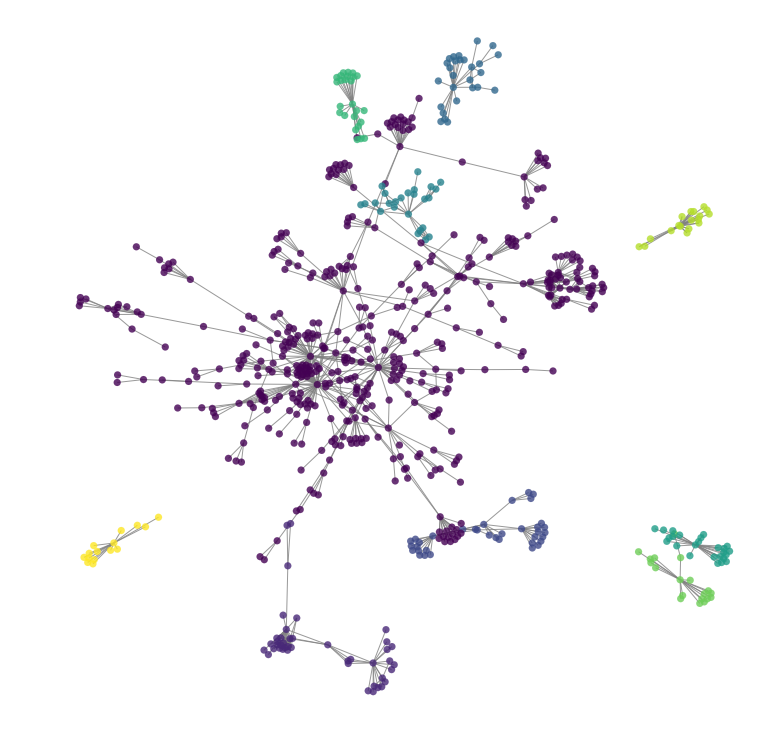

In [41]:
fig = plt.figure(figsize=(10, 10))


pos = nx.spring_layout(graph, k=0.05, seed=14)
nx.draw(subgraph, pos=pos, edge_color="grey", node_color=node_component_sorted, cmap=plt.cm.viridis,
        linewidths=0.1, node_size=50, alpha=0.8, with_labels=False)
plt.show()